# Solve the NN driven model in a scene

## Import libraries

In [1]:
# Python libraries
import os
import sys
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import tensorflow as tf
import matplotlib.pyplot as plt

# To enable LaTeX and select a font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# Using ipynb import functions defined in other nb
sys.path.append("myfun/")
from ipynb.fs.defs.myfun_load_dataset import *
from ipynb.fs.defs.myfun_model_nn import *
from ipynb.fs.defs.myfun_plot import *

2023-09-10 15:23:04.890003: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Tensorflow/Keras: 2.11.0
sklearn: 1.3.0


## Data Acquisition

In [2]:
# Load the dataset
par_dir = os.path.dirname(os.getcwd()) # parent dir
dir_name = par_dir + "/NN-interaction"
merged_df, dflist = load_dataset(dir_name, 'post') # we have 10 pandas dataframe, one for each couple(camera,sequence)

In [3]:
# For sake of simplicity conseder only a scene
df = dflist[0] # sequence
scn = df.T[0]  # scene

In [4]:
scn

Tarr              [14.240000000000002, 14.440000000000001, 14.64]
Xarr            [[47.39131045666992, 53.82017733698899, 60.334...
cons_dis        [[3.9987357284027283, 1.7240925784948118, 0.06...
N. vehicles                                                     3
cam                                                             1
day                                                             1
seq                                                             1
N. file                                                         1
Xarr_std        [[-0.47489203804198415, -0.11463101384939701, ...
XarrMean                                                55.865771
XarrStd                                                 17.845025
cons_dis_std    [[0.22408126592261313, 0.09661474870989278, 0....
Name: 0, dtype: object

In [5]:
# Useful params
N = scn['N. vehicles']
tstamps = scn['Tarr']

In [6]:
scn['Xarr']

array([[47.39131046, 53.82017734, 60.3346048 ],
       [51.39004619, 55.54426992, 60.39859453],
       [71.53057024, 77.25613794, 82.38676944]])

## Just to know the input of the NN

In [7]:
# Just to see what will be the X and y for our NN
X_arr, y_arr = create_data_ann_scene(scn)

In [8]:
print(f"We solve the NN driven ODE sys in each time interval of len=0.2s inside [{tstamps[0]},{tstamps[-1]}].\n\n\
In the first time interval [{tstamps[0]},{tstamps[1]}] we evaluate our NN using as:\n\
\t * X: {X_arr[:,1]} (consecutive distances btw the {N} vehicles)\n\
\t * y: {y_arr[:,1]} (approximated velocities)")

We solve the NN driven ODE sys in each time interval of len=0.2s inside [14.240000000000002,14.64].

In the first time interval [14.240000000000002,14.440000000000001] we evaluate our NN using as:
	 * X: [ 1.72409258 21.71186802] (consecutive distances btw the 3 vehicles)
	 * y: [32.5721373  24.27162308] (approximated velocities)


## Create the model NN

In [9]:
DOE =[[1,2,1]] #Design of experiment

# # Create the model
model = create_model(DOE[0])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 2)                 4         
                                                                 
 Output-Layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


### What do trainable variables and trainable weights mean?

In [10]:
len(model.trainable_variables), len(model.trainable_weights)

(3, 3)

In [11]:
for var in model.trainable_variables:
    print(f"{var.name}:\t {var.numpy().flatten()}")

Hidden-Layer-1/kernel:0:	 [-0.5432241  -0.45120692]
Hidden-Layer-1/bias:0:	 [-0.6035223  0.8080189]
Output-Layer/kernel:0:	 [0.2013514 0.4216993]


## Evaluate the NN in each time interval

In [12]:
v0 = 30
LEARNING_RATE_NN = 0.001
LEARNING_RATE_v0=0.5
NUM_ITER = 500
PLOT_ITER = 100

            - Time interval n.0: [14.24, 14.44]
                * y_true: [32.1443344  20.77111865]
                * v_ann: [12.849992752075195, 14.586737632751465, 27.718690840321006]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [14.44, 14.64]
                * y_true: [32.5721373  24.27162308]
                * v_ann: [15.955645561218262, 41.83095932006836, 27.718690840321006]

----------------------------------------------------------------------------------------------------
            * err= 8.140709005293525
            * Learning rate NN = 0.0010000000474974513
            * diff = 0.7041661020242991


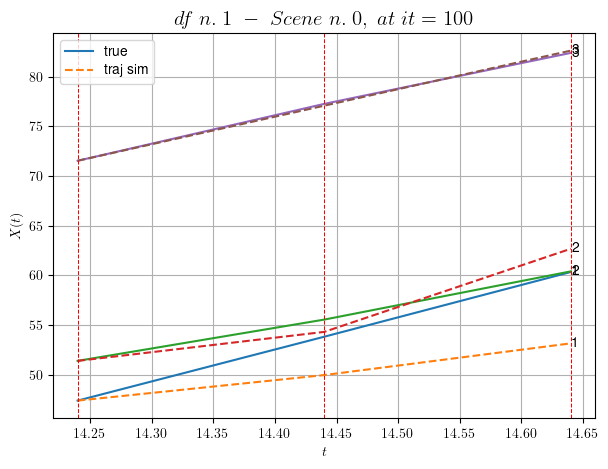

            - Time interval n.0: [14.24, 14.44]
                * y_true: [32.1443344  20.77111865]
                * v_ann: [24.555652618408203, 36.7608757019043, 27.63905576968326]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [14.44, 14.64]
                * y_true: [32.5721373  24.27162308]
                * v_ann: [20.328359603881836, 19.323007583618164, 27.63905576968326]

----------------------------------------------------------------------------------------------------
            * err= 3.690958257786899
            * Learning rate NN = 0.0009000000427477062
            * diff = 0.2634531428284168


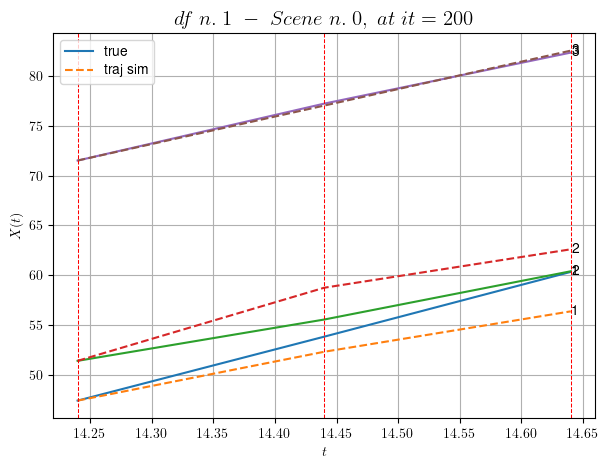

            - Time interval n.0: [14.24, 14.44]
                * y_true: [32.1443344  20.77111865]
                * v_ann: [26.87640380859375, 32.36528778076172, 27.636371793315657]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [14.44, 14.64]
                * y_true: [32.5721373  24.27162308]
                * v_ann: [25.21291732788086, 22.919017791748047, 27.636371793315657]

----------------------------------------------------------------------------------------------------
            * err= 1.9043421384814854
            * Learning rate NN = 0.0008099999977275729
            * diff = 0.055274779354609116


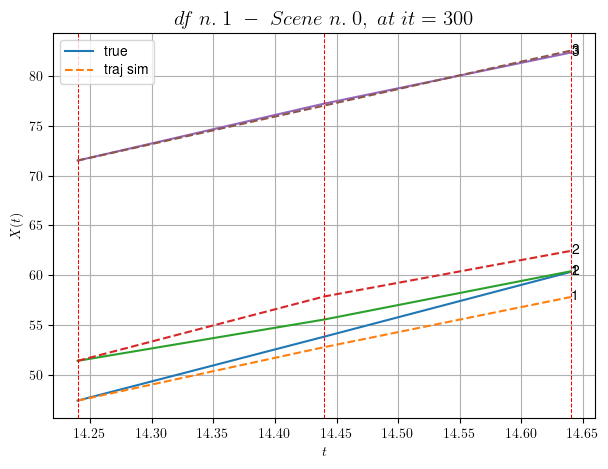

            - Time interval n.0: [14.24, 14.44]
                * y_true: [32.1443344  20.77111865]
                * v_ann: [27.03408432006836, 29.685667037963867, 27.6362813340609]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [14.44, 14.64]
                * y_true: [32.5721373  24.27162308]
                * v_ann: [26.985111236572266, 25.37872886657715, 27.6362813340609]

----------------------------------------------------------------------------------------------------
            * err= 1.4329577245358875
            * Learning rate NN = 0.0007289999630302191
            * diff = 0.007367254721972527


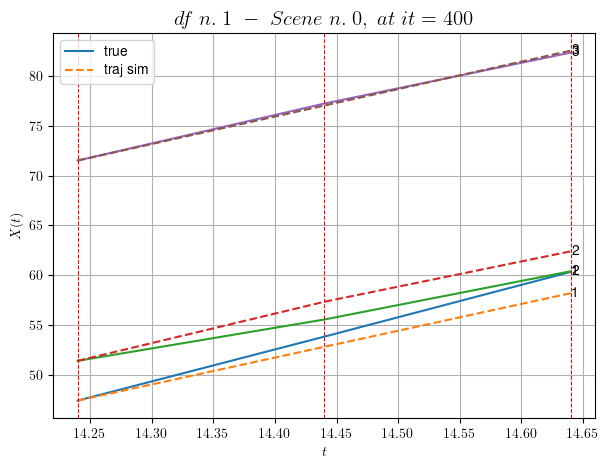

            - Time interval n.0: [14.24, 14.44]
                * y_true: [32.1443344  20.77111865]
                * v_ann: [26.911203384399414, 29.321508407592773, 27.636278285272233]

----------------------------------------------------------------------------------------------------
            - Time interval n.1: [14.44, 14.64]
                * y_true: [32.5721373  24.27162308]
                * v_ann: [27.364151000976562, 25.717649459838867, 27.636278285272233]

----------------------------------------------------------------------------------------------------
            * err= 1.3840287798166555
            * Learning rate NN = 0.0007289999630302191
            * diff = 0.003751386863064754


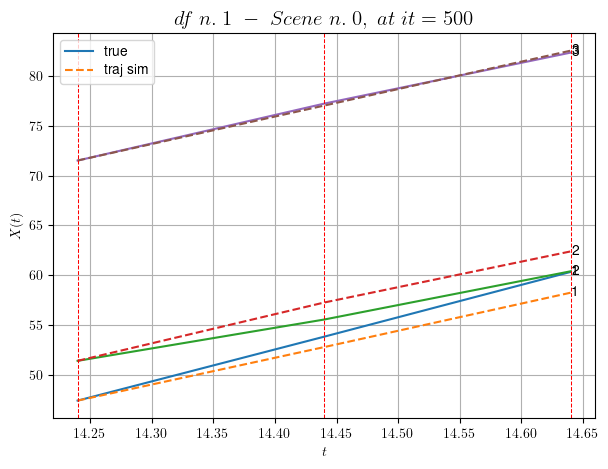

In [13]:
t_cus, x_cus, _, _, _ = solve_nn_scn_custom(model, scn, v0, LEARNING_RATE_NN, LEARNING_RATE_v0, NUM_ITER, PLOT_ITER)

### Plot

In [14]:
# Params for the plot
trajs = [scn['Xarr'],  np.array(x_cus)]
labels_plot = ["true", "nn sim custom"]
title = f"Trajs simulated by NN driven LWR model"

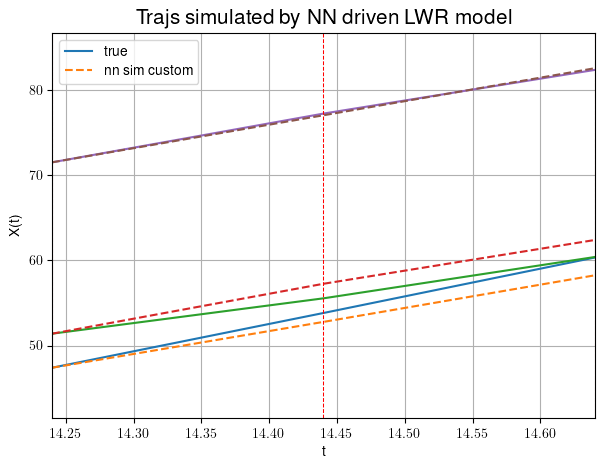

In [15]:
# fig 
width, height = 7, 5
fig, ax = plt.subplots(figsize=(width,height))

for veh in range(0,N):
    ax.plot(tstamps, scn['Xarr'][veh])
    ax.plot(t_cus, x_cus[veh], '--')


for ts in tstamps:
    ax.axvline(x = ts, color = 'red', linestyle = '--', linewidth=0.75)
    
# Annotate the name of each variable at the last value
plot_annotation(ax, scn, trajs, scale=1.004)

ax.set_xlabel("t")
ax.set_ylabel("X(t)")
ax.set_title(title, fontsize=15)
# Limits for the plot
plot_limits(ax, scn, trajs, xbal=0, ybal=0.05)
plt.legend(labels_plot)
plt.grid()
plt.show()

## Match the computed solution to the same timestamps of the scene

In [16]:
deltat = 0.05

# To recover the same timestep in the data
factor = int(0.2/deltat)

if len(set(tstamps - np.array(t_cus)[::factor])) == 1:
    print(f"timestamps coincide!")
    print("* tstamps: \t\t\t", tstamps,\
          "\n* np.array(t_ann_list): \t",np.array(t_cus)[::factor])
else:
    print(f"There is a mismatch in the timestamps: tstamps != tspan[::factor]")

timestamps coincide!
* tstamps: 			 [14.24 14.44 14.64] 
* np.array(t_ann_list): 	 [14.24 14.44 14.64]


In [17]:
## To match solution and timestamps
t_ann = np.array(t_cus)[::factor]
x_ann = np.array([traj[::factor] for traj in x_cus])